### Імпорт модулів

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import time

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Параметри моделі

In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 200

img_rows, img_cols = 32, 32
img_channels = 3

### Створити модель

Спочатку напишемо функцію, яку будемо перевикористовувати для створення моделі певної архітектури.

In [4]:
def build_model(nb_classes, img_channels, img_rows, img_cols):
    model = Sequential()

    # Note: it expects the data_format='channels_first'
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(img_channels, img_rows, img_cols)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    
    return model

Тепер створимо модель.

In [5]:
model = build_model(nb_classes, img_channels, img_rows, img_cols)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Ми можемо зберегти схему моделі у `model.png` файл.

In [ ]:
plot_model(model, to_file='model.png')

Маємо наступну схему моделі

<img src="https://github.com/egoliuk/classification_with_CNN/blob/master/classify_images_in_CIFAR-10/model.png?raw=true">

### Завантажити набір даних CIFAR-10 та підготувати його до тренування

In [15]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

Loading data...
X_train shape: (50000, 3, 32, 32)
X_test shape: (10000, 3, 32, 32)
50000 train samples
10000 test samples
Y_train shape: (50000, 10)
Y_test shape: (10000, 10)


Нормалізуємо набір

In [17]:
X_train = X_train.astype('float32') - 128
X_test = X_test.astype('float32') - 128
X_train /= 128
X_test /= 128

### Тренувати модель

In [7]:
tic = time.perf_counter()

history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks=[ModelCheckpoint('weights/cifar.h5', save_best_only=False)])

toc = time.perf_counter()

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 168s 3ms/step - loss: 1.9897 - acc: 0.2395 - val_loss: 1.6870 - val_acc: 0.3830
Epoch 2/200
50000/50000 [==============================] - 166s 3ms/step - loss: 1.5261 - acc: 0.4370 - val_loss: 1.4188 - val_acc: 0.4885
Epoch 3/200
50000/50000 [==============================] - 166s 3ms/step - loss: 1.3082 - acc: 0.5278 - val_loss: 1.1439 - val_acc: 0.5906
Epoch 4/200
50000/50000 [==============================] - 168s 3ms/step - loss: 1.1586 - acc: 0.5849 - val_loss: 1.0166 - val_acc: 0.6386
Epoch 5/200
50000/50000 [==============================] - 167s 3ms/step - loss: 1.0437 - acc: 0.6290 - val_loss: 0.9425 - val_acc: 0.6681
Epoch 6/200
50000/50000 [==============================] - 165s 3ms/step - loss: 0.9648 - acc: 0.6570 - val_loss: 0.8522 - val_acc: 0.7011
Epoch 7/200
50000/50000 [==============================] - 177s 4ms/

50000/50000 [==============================] - 114s 2ms/step - loss: 0.2710 - acc: 0.9048 - val_loss: 0.5078 - val_acc: 0.8492
Epoch 58/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.2612 - acc: 0.9076 - val_loss: 0.5232 - val_acc: 0.8449
Epoch 59/200
50000/50000 [==============================] - 115s 2ms/step - loss: 0.2604 - acc: 0.9077 - val_loss: 0.5024 - val_acc: 0.8435
Epoch 60/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.2585 - acc: 0.9082 - val_loss: 0.5251 - val_acc: 0.8443
Epoch 61/200
50000/50000 [==============================] - 115s 2ms/step - loss: 0.2562 - acc: 0.9094 - val_loss: 0.5197 - val_acc: 0.8447
Epoch 62/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.2520 - acc: 0.9101 - val_loss: 0.5201 - val_acc: 0.8457
Epoch 63/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.2492 - acc: 0.9118 - val_loss: 0.5427 - val_acc: 0.8430
Epoch 64/200
50000/50000 [=======

50000/50000 [==============================] - 114s 2ms/step - loss: 0.1769 - acc: 0.9374 - val_loss: 0.5929 - val_acc: 0.8461
Epoch 116/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1774 - acc: 0.9390 - val_loss: 0.5747 - val_acc: 0.8478
Epoch 117/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1812 - acc: 0.9365 - val_loss: 0.5370 - val_acc: 0.8529
Epoch 118/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1796 - acc: 0.9370 - val_loss: 0.5471 - val_acc: 0.8525
Epoch 119/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1770 - acc: 0.9379 - val_loss: 0.5702 - val_acc: 0.8490
Epoch 120/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1802 - acc: 0.9369 - val_loss: 0.5493 - val_acc: 0.8522
Epoch 121/200
50000/50000 [==============================] - 115s 2ms/step - loss: 0.1788 - acc: 0.9385 - val_loss: 0.5541 - val_acc: 0.8529
Epoch 122/200
50000/50000 [

50000/50000 [==============================] - 114s 2ms/step - loss: 0.1538 - acc: 0.9464 - val_loss: 0.5819 - val_acc: 0.8518
Epoch 174/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1506 - acc: 0.9491 - val_loss: 0.5773 - val_acc: 0.8562
Epoch 175/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1551 - acc: 0.9468 - val_loss: 0.5961 - val_acc: 0.8470
Epoch 176/200
50000/50000 [==============================] - 115s 2ms/step - loss: 0.1478 - acc: 0.9478 - val_loss: 0.5740 - val_acc: 0.8526
Epoch 177/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1526 - acc: 0.9471 - val_loss: 0.5540 - val_acc: 0.8547
Epoch 178/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1467 - acc: 0.9494 - val_loss: 0.5785 - val_acc: 0.8514
Epoch 179/200
50000/50000 [==============================] - 114s 2ms/step - loss: 0.1502 - acc: 0.9495 - val_loss: 0.5486 - val_acc: 0.8542
Epoch 180/200
50000/50000 [

In [20]:
print("Час тренування: " + str(toc - tic) + " сек.")

Час тренування: 24070.018134781007 сек.


### Точність моделі

Переглянемо криві зміни значення точності моделі та функції втрат під час тренування та валідації моделі.

In [21]:
# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

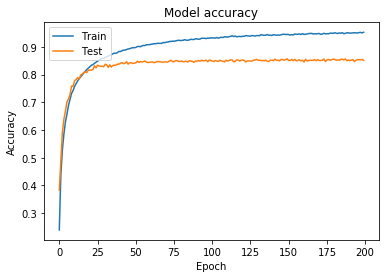

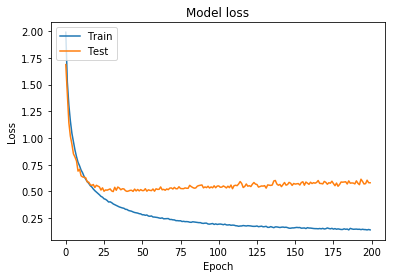

In [22]:
plot_accuracy(history)
plot_loss(history)

Тепер перевіримо точність моделі на тестовій виборці.

In [23]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 7s 737us/step
Test score: 0.5814649774551391
Test accuracy: 0.8513


### Висновок

Ми бачимо, що точність моделі під час тренування рівномірно зростає на даних для тренування та валідації до 26 епохи (приблизно), потім модель продовжує повільно збільшувати точність на тренувальній вибірці і з часом останні 100 епох (приблизно) зростання майже не відбувається. При цьому на даних для валідації точність моделі майже припиняє зростати вже після 26 епохи. Зрештою, ми бачимо, що тренування протягом 200 епох призводит до перенавчання і майже не покращує класифікаціїні здібності моделі у порівнянні з 26 епохою. Перевірка на тестових даних підтверджує це.

При цьому загальний час тренування моделі 24070 секунд, тобто майже 7 годин. Отже ми можемо навчиту нову модель, скоротивши кікість епох з 200 до 27. Модель має бути не така перенавчена і час тренування суттєво скоротиться. 

### Зменшимо кількість епох тренування

In [25]:
model2 = build_model(nb_classes, img_channels, img_rows, img_cols)

In [26]:
tic2 = time.perf_counter()

history2 = model2.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=26,
                    validation_data=(X_test, Y_test),
                    shuffle=True,
                    callbacks=[ModelCheckpoint('weights/cifar2.h5', save_best_only=False)])

toc2 = time.perf_counter()

Train on 50000 samples, validate on 10000 samples
Epoch 1/26
50000/50000 [==============================] - 124s 2ms/step - loss: 1.9831 - acc: 0.2515 - val_loss: 1.5933 - val_acc: 0.4144
Epoch 2/26
50000/50000 [==============================] - 125s 2ms/step - loss: 1.5187 - acc: 0.4378 - val_loss: 1.3451 - val_acc: 0.5143
Epoch 3/26
50000/50000 [==============================] - 132s 3ms/step - loss: 1.3017 - acc: 0.5264 - val_loss: 1.1270 - val_acc: 0.6033
Epoch 4/26
50000/50000 [==============================] - 132s 3ms/step - loss: 1.1621 - acc: 0.5809 - val_loss: 1.0107 - val_acc: 0.6394
Epoch 5/26
50000/50000 [==============================] - 128s 3ms/step - loss: 1.0587 - acc: 0.6248 - val_loss: 0.9331 - val_acc: 0.6690
Epoch 6/26
50000/50000 [==============================] - 128s 3ms/step - loss: 0.9707 - acc: 0.6576 - val_loss: 0.8612 - val_acc: 0.6987
Epoch 7/26
50000/50000 [==============================] - 124s 2ms/step - loss: 0.8970 - acc: 0.6840 - val_loss: 0.8574 - 

In [28]:
print("Час тренування: " + str(toc2 - tic2) + " сек.")

Час тренування: 3246.5531997410144 сек.


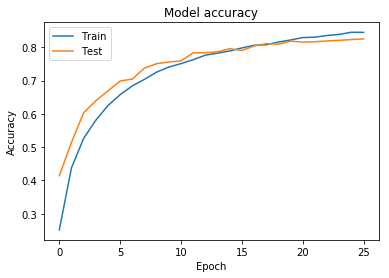

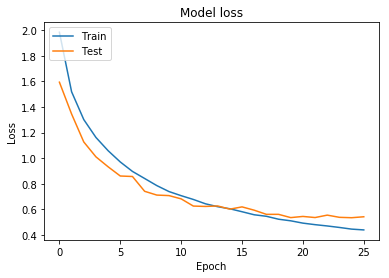

In [29]:
plot_accuracy(history2)
plot_loss(history2)

In [30]:
score2, acc2 = model2.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test score:', score2)
print('Test accuracy:', acc2)

10000/10000 [==============================] - 6s 626us/step
Test score: 0.5431307132720947
Test accuracy: 0.8251


### Висновок

Тепер на тренування моделі іде 3247 сек. тобто майже 1 година, що в 7 раз швидше. При цьому точність моделі перевірена на виборці для тренування, перевірки та тестування зростає рівномірно та не має значних розбіжностей, схоже, що ми уникнули перенавчання.